# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter
import os

import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader
from PIL import Image

import sys
import torch.optim as optim

In [2]:
print("PyTorch Version: ",torch.__version__)

PyTorch Version:  2.2.2+cu121


Here annotations are in xml and images are in png. So xmltodict can be installed for which is a Python module that makes working with XML feel like working with JSON.xmltodict also lets roundtrip back to XML with the unparse function, has a streaming mode suitable for handling files that don’t fit in memory, and supports XML namespaces.

In [3]:
import xmltodict

# Extraction of Images and Annotations

The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.

Here we are using os.walk() and os.path.join()

* os.walk() returns a generator, that creates a 3-tuple
    * dirpath :- It is a string, with provides the path to the directory.
    * dirnames(in dirpath) : - It is a list of the names of the subdirectories in dirpath (excluding '.' and '..')
    * filenames(in dirpath):- It is a list of the names of the non-directory files in dirpath. 

Every time the generator is called it will follow each directory recursively until no further sub-directories are available from the initial directory that walk was called upon.

* os.path.join(dirpath, name) is used to get a full path (which begins with top) to a file or directory in dirpath. 

You can read more from [here](https://docs.python.org/3/library/os.html#os.walk)


All the images are stored in img_names list and annotations in xml_names list.

In [4]:
img_names=[] 
xml_names=[] 
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:]!="xml":
            img_names.append(filename)
        else:
            xml_names.append(filename)

print(img_names)

['maksssksksss0.png', 'maksssksksss1.png', 'maksssksksss10.png', 'maksssksksss100.png', 'maksssksksss101.png', 'maksssksksss102.png', 'maksssksksss103.png', 'maksssksksss104.png', 'maksssksksss105.png', 'maksssksksss106.png', 'maksssksksss107.png', 'maksssksksss108.png', 'maksssksksss109.png', 'maksssksksss11.png', 'maksssksksss110.png', 'maksssksksss111.png', 'maksssksksss112.png', 'maksssksksss113.png', 'maksssksksss114.png', 'maksssksksss115.png', 'maksssksksss116.png', 'maksssksksss117.png', 'maksssksksss118.png', 'maksssksksss119.png', 'maksssksksss12.png', 'maksssksksss120.png', 'maksssksksss121.png', 'maksssksksss122.png', 'maksssksksss123.png', 'maksssksksss124.png', 'maksssksksss125.png', 'maksssksksss126.png', 'maksssksksss127.png', 'maksssksksss128.png', 'maksssksksss129.png', 'maksssksksss13.png', 'maksssksksss130.png', 'maksssksksss131.png', 'maksssksksss132.png', 'maksssksksss133.png', 'maksssksksss134.png', 'maksssksksss135.png', 'maksssksksss136.png', 'maksssksksss137.p

In [5]:
path_annotations="kaggle/input/face-mask-detection/annotations/" 
listing=[]
for i in img_names[:]:
    with open(path_annotations+i[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            listing.append(temp[i]["name"])
    else:
        listing.append(temp["name"])
        

Items = Counter(listing).keys()
values = Counter(listing).values()
print(Items,'\n',values)

dict_keys(['without_mask', 'with_mask', 'mask_weared_incorrect']) 
 dict_values([717, 3232, 123])


# Visualisation and Analysis of Target Class

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Target Classes belongs to :<li style="padding-left:1em">with_mask</li>
    <li style="padding-left:1em">mask_weared_incorrect</li>
    <li style="padding-left:1em">without_mask</li>
             </p> </div>

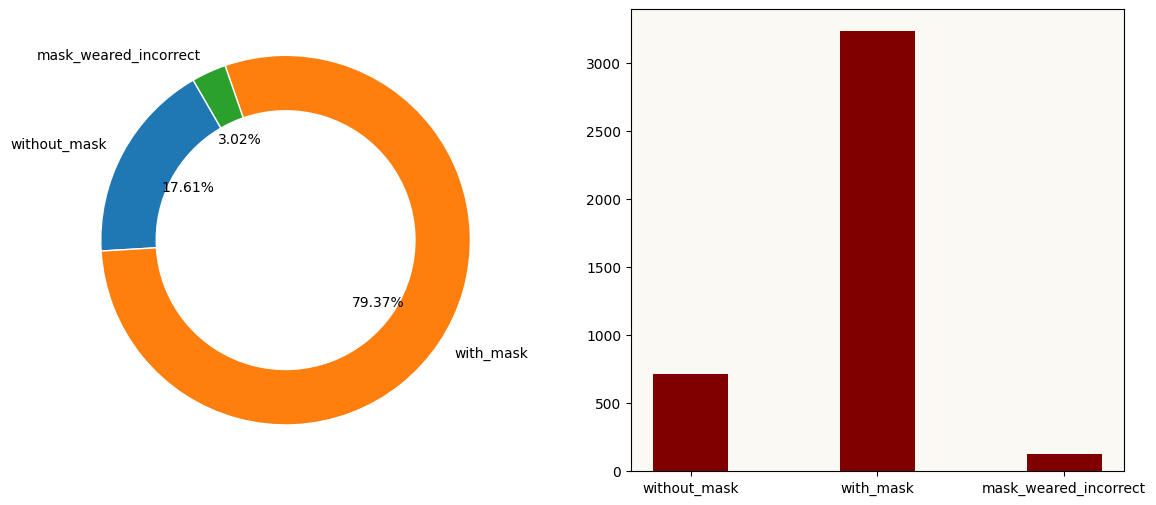

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
background_color = '#faf9f4'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color) 
ax1.pie(values,wedgeprops=dict(width=0.3, edgecolor='w') ,
        labels=Items, radius=1, startangle = 120, autopct='%1.2f%%')

ax2 = plt.bar(Items, list(values),
              color ='maroon',width = 0.4)

plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Dataset contain images :<li style="padding-left:1em">with_mask : 79.37%</li>
    <li style="padding-left:1em">mask_weared_incorrect : 3.02% </li>
    <li style="padding-left:1em">without_mask : 17.61%</li>
             </p> </div>

# Images Identification with Target Class

As there are 3 classes in target, we can use 3 colors for cascading the face.
* Red --> without_mask
* Green --> with_mask
* Yellow -- > mask_weared_incorrect

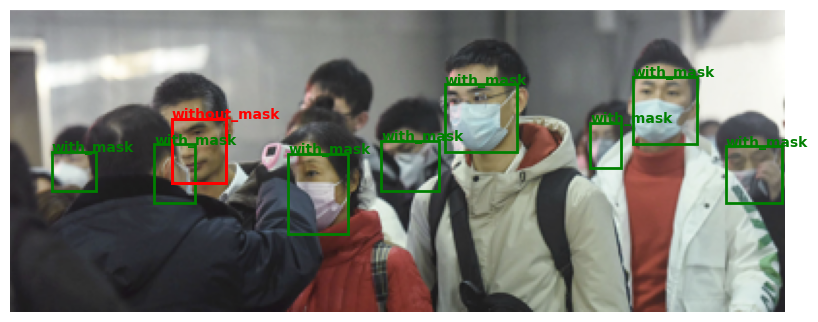

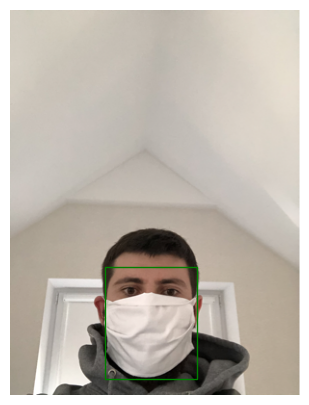

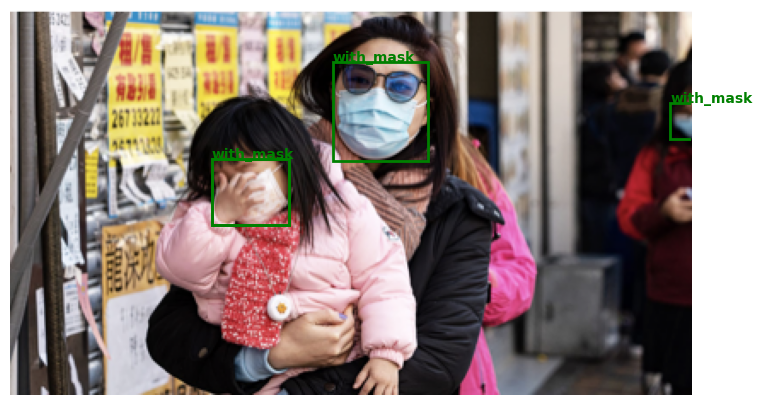

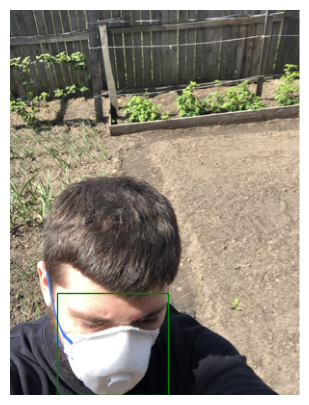

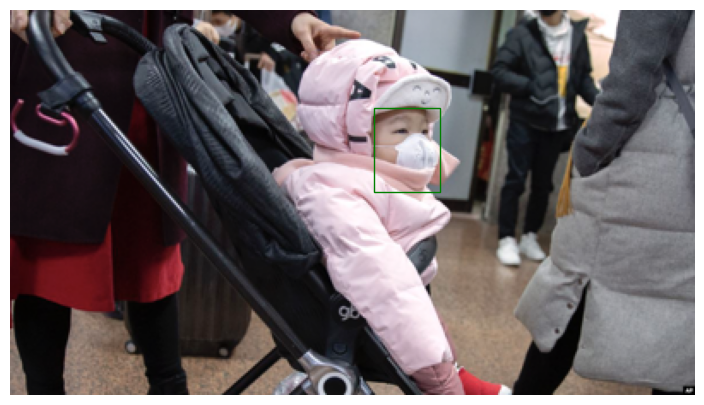

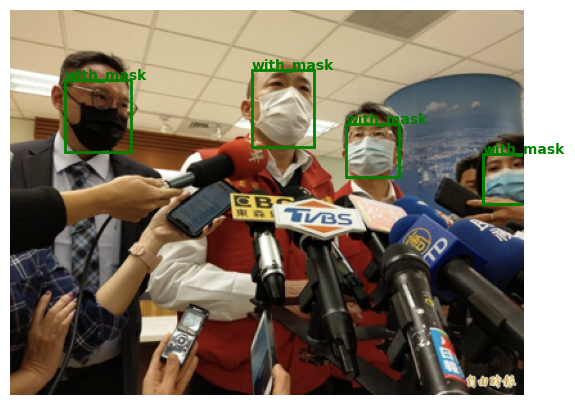

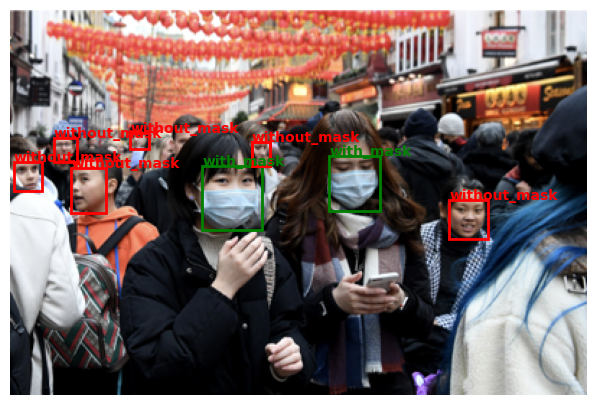

In [7]:
path_image="kaggle/input/face-mask-detection/images/"  
def face_cas(img): 
    with open(path_annotations+img[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    image=plt.imread(os.path.join(path_image+img))
    fig,ax=plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(10,5)
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            ###with_mask
            if temp[i]["name"]=="with_mask":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='g',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("with_mask", (rx, ry), color='green', weight='bold', fontsize=10, ha='left', va='baseline')
            ###without_mask
            if temp[i]["name"]=="without_mask":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))     
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='r',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("without_mask", (rx, ry), color='red', weight='bold', fontsize=10, ha='left', va='baseline')
            ###mask_weared_incorrect
            if temp[i]["name"]=="mask_weared_incorrect":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='y',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("mask_weared_incorrect", (rx, ry), color='yellow', weight='bold', fontsize=10, ha='left', va='baseline')
    else:
        x,y,w,h=list(map(int,temp["bndbox"].values()))
        edgecolor={"with_mask":"g","without_mask":"r","mask_weared_incorrect":"y"}
        mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor=edgecolor[temp["name"]],facecolor="none",)
    ax.imshow(image)
    ax.add_patch(mpatch)

fun_images = img_names.copy()
for i in range(1,8):
    face_cas(fun_images[i])

# Image Preprocessing

The Image is preprocessed as PyTorch tensors. The transforms function of torchvision is used to define pipeline of basic data preprocessing.

Functions used for preprocessing are :

*    **xmltodict.parse()** : This is used to parse the given XML input and convert it into a dictionary. 

    Generak syntax of xmltodict.parse() is 
    
    xmltodict.parse(xml_input, encoding='utf-8', expat=expat, process_namespaces=False, namespace_separator=':', **kwargs)
    *     **xml_input** : It can be a either be a string or a file-like object. Here we are using read() method, which reads at most n bytes from file desciptor and return a string containing the bytes read. If the end of file referred to by fd has been reached, an empty string is returned.
    *    **torchvision.transforms.Compose()** : torchvision.transforms is used for common image transformations and when Compose is chained with it to Compose several transforms together.
    *    **transforms.ToTensor()**: This just converts input image to PyTorch tensor.
    *    **torch.tensor()**:  It infers the dtype automatically. It always copies the data and torch.tensor(l) is equivalent to l.clone().detach().
    *    **transforms.Resize()** : The default interpolation is InterpolationMode.BILINEAR. It resize the input image as per the height and width provided. 
    *    **transforms.functional.crop()** : Crop the given image at specified location and output size and it returs torch.Tensor.
    
    
With preprocessed Images dataset is created and then we can split the dataset to training and test set. 
  
    

In [8]:
options={"with_mask":0,"without_mask":1,"mask_weared_incorrect":2} 

In [9]:
def dataset_creation(image_list): 
    image_tensor=[]
    label_tensor=[]
    for i,j in enumerate(image_list):
        with open(path_annotations+j[:-4]+".xml") as fd:
            doc=xmltodict.parse(fd.read())
        if type(doc["annotation"]["object"])!=list:
            temp=doc["annotation"]["object"]
            x,y,w,h=list(map(int,temp["bndbox"].values()))
            label=options[temp["name"]]
            image=transforms.functional.crop(Image.open(path_image+j).convert("RGB"), y,x,h-y,w-x)
            image_tensor.append(my_transform(image))
            label_tensor.append(torch.tensor(label))
        else:
            temp=doc["annotation"]["object"]
            for k in range(len(temp)):
                x,y,w,h=list(map(int,temp[k]["bndbox"].values()))
                label=options[temp[k]["name"]]
                image=transforms.functional.crop(Image.open(path_image+j).convert("RGB"),y,x,h-y,w-x)
                image_tensor.append(my_transform(image))
                label_tensor.append(torch.tensor(label))
                
    final_dataset=[[k,l] for k,l in zip(image_tensor,label_tensor)]
    return tuple(final_dataset)


my_transform=transforms.Compose([transforms.Resize((226,226)),
                                 transforms.ToTensor()])

mydataset=dataset_creation(img_names)

In mathematics, a tensor is an algebraic object that describes a multilinear relationship between sets of algebraic objects related to a vector space. The dataset created will be of tensor.

In [10]:
mydataset[0]

[tensor([[[0.4941, 0.4941, 0.4941,  ..., 0.6157, 0.6157, 0.6157],
          [0.4941, 0.4941, 0.4941,  ..., 0.6157, 0.6157, 0.6157],
          [0.4941, 0.4941, 0.4941,  ..., 0.6157, 0.6157, 0.6157],
          ...,
          [0.1843, 0.1843, 0.1843,  ..., 0.3216, 0.3216, 0.3216],
          [0.1843, 0.1843, 0.1843,  ..., 0.3216, 0.3216, 0.3216],
          [0.1843, 0.1843, 0.1843,  ..., 0.3216, 0.3216, 0.3216]],
 
         [[0.4431, 0.4431, 0.4431,  ..., 0.5216, 0.5216, 0.5216],
          [0.4431, 0.4431, 0.4431,  ..., 0.5216, 0.5216, 0.5216],
          [0.4431, 0.4431, 0.4431,  ..., 0.5216, 0.5216, 0.5216],
          ...,
          [0.1216, 0.1216, 0.1216,  ..., 0.1647, 0.1647, 0.1647],
          [0.1216, 0.1216, 0.1216,  ..., 0.1647, 0.1647, 0.1647],
          [0.1216, 0.1216, 0.1216,  ..., 0.1647, 0.1647, 0.1647]],
 
         [[0.4784, 0.4784, 0.4784,  ..., 0.5216, 0.5216, 0.5216],
          [0.4784, 0.4784, 0.4784,  ..., 0.5216, 0.5216, 0.5216],
          [0.4784, 0.4784, 0.4784,  ...,

# Splitting Dataset into Training and Test Set

In [11]:
train_size=int(len(mydataset)*0.7)
test_size=len(mydataset)-train_size
print('Length of dataset is', len(mydataset), '\nLength of training set is :',train_size,'\nLength of test set is :', test_size)

Length of dataset is 4072 
Length of training set is : 2850 
Length of test set is : 1222


To split dataset, torch.utils.data.random_split() is used which randomly splits the dataset into non-overlapping new datasets of given lengths.

In [12]:
trainset,testset=torch.utils.data.random_split(mydataset,[train_size,test_size])

# Samples in Training Set

DataLoader() is an iterable that abstracts this complexity for us in an easy API. When shuffle is made true data is shuffled, after the iteration is over for all batches.


In [13]:
train_dataloader =DataLoader(dataset=trainset,batch_size=32,shuffle=True,num_workers=4)
test_dataloader =DataLoader(dataset=testset,batch_size=32,shuffle=True,num_workers=4)

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available()
                               else "cpu")

In [15]:
import sys
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([32, 3, 226, 226])
Labels batch shape: torch.Size([32])


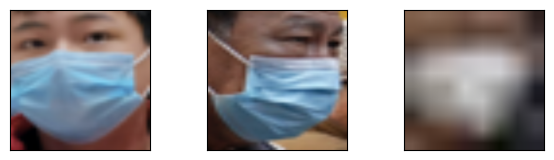

In [16]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
    
train_features_np=train_features.numpy()

fig=plt.figure(figsize=(25,4))
for idx in np.arange(3):
    ax=fig.add_subplot(2,int(20/2),idx+1,xticks=[],yticks=[])
    plt.imshow(np.transpose(train_features_np[idx],(1,2,0)))
    

# Model Building

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    ResNet - Deep Residual Learning for Image Recognition
             </p> </div>



The Residual Network, or ResNet for short, is a model that makes use of the residual module.There are several variants of different sizes, including Resnet18, Resnet34, Resnet50, Resnet101, and Resnet152, all of which are available from torchvision models. **Here Resnet34 model is used.**

When deeper networks are able to start converging, degradation problem occurs. As the network depth increases, the accuracy gets saturated and then degrades rapidly. These degradation is not caused by overfitting, and adding
more layers to a suitably deep model leads to higher training error. Degradation indicates **not** all systems are similarly easy to optimize.

Deep residual learning framework address the degradation problem. Instead of hoping each few stacked layers directly fit a desired underlying mapping,   these layers are explicitly made to fit a residual mapping.

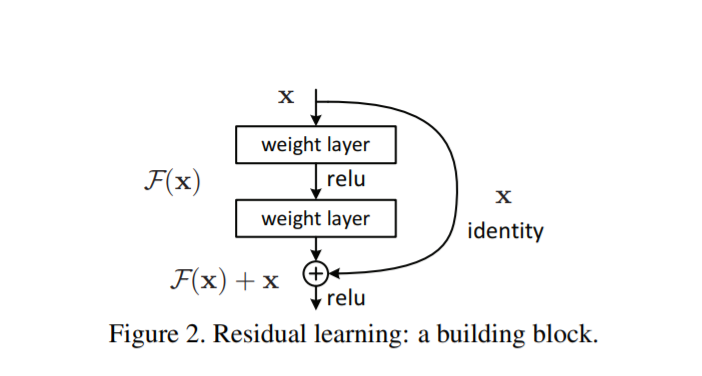

The formulation of F(x) +x can be realized by feedforward neural networks with “shortcut connections”. The shortcut connections here simply perform identity mapping, and their outputs are added to the outputs of the stacked layers.The entire network can still be trained end-to-end by SGD with backpropagation, and can be easily implemented using common libraries without modifying the solvers.

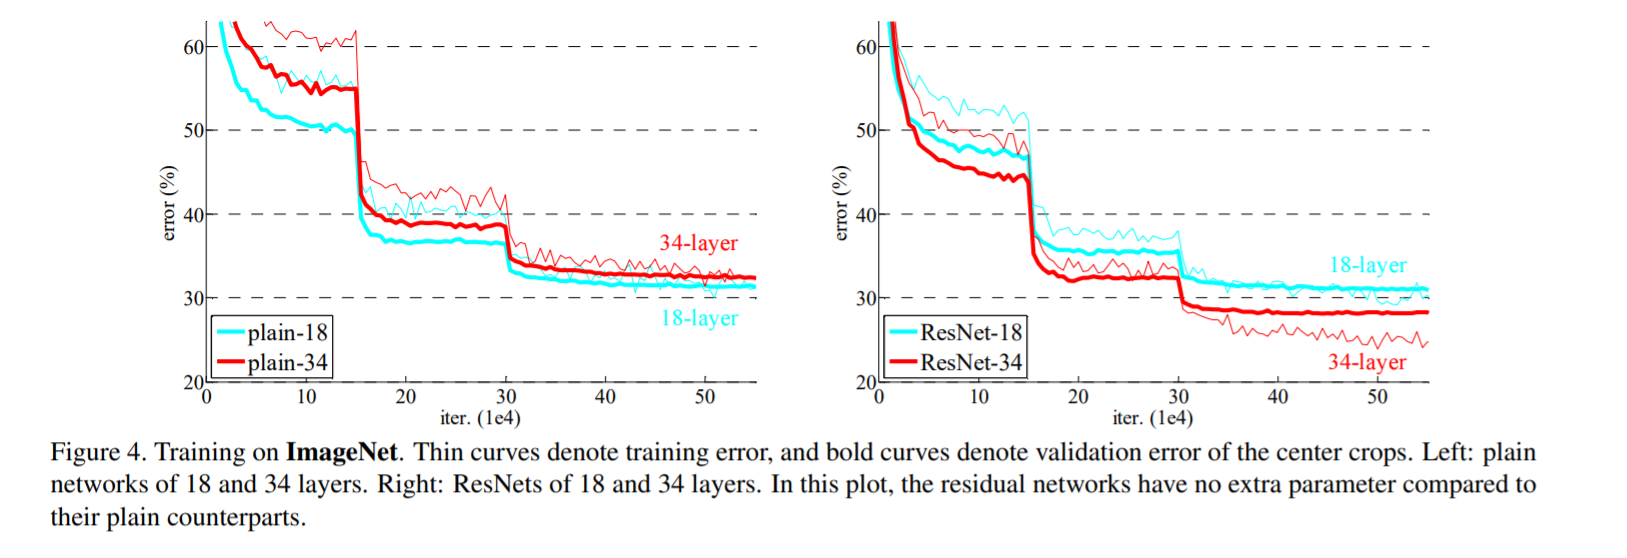

# Download the resnet34 layers pre-trained model

In torchvision.models.resnet34(), when pretrained is provided as True, it returns a model pre-trained on ImageNet.


In [17]:
from torch import nn
from collections import OrderedDict
from torch.nn import functional as F

In [18]:
def gabor_kernel(frequency,  sigma_x, sigma_y, theta=0, offset=0, ks=61):

    w = ks // 2
    grid_val = torch.arange(-w, w+1, dtype=torch.float)
    x, y = torch.meshgrid(grid_val, grid_val)
    rotx = x * np.cos(theta) + y * np.sin(theta)
    roty = -x * np.sin(theta) + y * np.cos(theta)
    g = torch.zeros(y.shape)
    g[:] = torch.exp(-0.5 * (rotx ** 2 / sigma_x ** 2 + roty ** 2 / sigma_y ** 2))
    g /= 2 * np.pi * sigma_x * sigma_y
    g *= torch.cos(2 * np.pi * frequency * rotx + offset)

    return g


def sample_dist(hist, bins, ns, scale='linear'):
    rand_sample = np.random.rand(ns)
    if scale == 'linear':
        rand_sample = np.interp(rand_sample, np.hstack(([0], hist.cumsum())), bins)
    elif scale == 'log2':
        rand_sample = np.interp(rand_sample, np.hstack(([0], hist.cumsum())), np.log2(bins))
        rand_sample = 2**rand_sample
    elif scale == 'log10':
        rand_sample = np.interp(rand_sample, np.hstack(([0], hist.cumsum())), np.log10(bins))
        rand_sample = 10**rand_sample
    return rand_sample



In [19]:
class Identity(nn.Module):
    def forward(self, x):
        return x


class GFB(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=4):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = (kernel_size, kernel_size)
        self.stride = (stride, stride)
        self.padding = (kernel_size // 2, kernel_size // 2)

        # Param instatiations
        self.weight = torch.zeros((out_channels, in_channels, kernel_size, kernel_size))

    def forward(self, x):
        return F.conv2d(x, self.weight, None, self.stride, self.padding)

    def initialize(self, sf, theta, sigx, sigy, phase):
        random_channel = torch.randint(0, self.in_channels, (self.out_channels,))
        for i in range(self.out_channels):
            self.weight[i, random_channel[i]] = gabor_kernel(frequency=sf[i], sigma_x=sigx[i], sigma_y=sigy[i],
                                                             theta=theta[i], offset=phase[i], ks=self.kernel_size[0])
        self.weight = nn.Parameter(self.weight, requires_grad=False)


class VOneBlock(nn.Module):
    def __init__(self, sf, theta, sigx, sigy, phase,
                 k_exc=25, noise_mode=None, noise_scale=1, noise_level=1,
                 simple_channels=128, complex_channels=128, ksize=25, stride=4, input_size=224):
        super().__init__()

        self.in_channels = 3

        self.simple_channels = simple_channels
        self.complex_channels = complex_channels
        self.out_channels = simple_channels + complex_channels
        self.stride = stride
        self.input_size = input_size

        self.sf = sf
        self.theta = theta
        self.sigx = sigx
        self.sigy = sigy
        self.phase = phase
        self.k_exc = k_exc

        self.set_noise_mode(noise_mode, noise_scale, noise_level)
        self.fixed_noise = None

        self.simple_conv_q0 = GFB(self.in_channels, self.out_channels, ksize, stride)
        self.simple_conv_q1 = GFB(self.in_channels, self.out_channels, ksize, stride)
        self.simple_conv_q0.initialize(sf=self.sf, theta=self.theta, sigx=self.sigx, sigy=self.sigy,
                                       phase=self.phase)
        self.simple_conv_q1.initialize(sf=self.sf, theta=self.theta, sigx=self.sigx, sigy=self.sigy,
                                       phase=self.phase + np.pi / 2)

        self.simple = nn.ReLU(inplace=True)
        self.complex = Identity()
        self.gabors = Identity()
        self.noise = nn.ReLU(inplace=True)
        self.output = Identity()

    def forward(self, x):
        # Gabor activations [Batch, out_channels, H/stride, W/stride]
        x = self.gabors_f(x)
        # Noise [Batch, out_channels, H/stride, W/stride]
        x = self.noise_f(x)
        # V1 Block output: (Batch, out_channels, H/stride, W/stride)
        x = self.output(x)
        return x

    def gabors_f(self, x):
        s_q0 = self.simple_conv_q0(x)
        s_q1 = self.simple_conv_q1(x)
        c = self.complex(torch.sqrt(s_q0[:, self.simple_channels:, :, :] ** 2 +
                                    s_q1[:, self.simple_channels:, :, :] ** 2 + 1e-8) / np.sqrt(2))
        s = self.simple(s_q0[:, 0:self.simple_channels, :, :])
        return self.gabors(self.k_exc * torch.cat((s, c), 1))

    def noise_f(self, x):
        if self.noise_mode == 'neuronal':
            eps = 10e-5
            x *= self.noise_scale
            x += self.noise_level
            if self.fixed_noise is not None:
                x += self.fixed_noise * torch.sqrt(F.relu(x.clone()) + eps)
            else:
                x += torch.distributions.normal.Normal(torch.zeros_like(x), scale=1).rsample() * \
                     torch.sqrt(F.relu(x.clone()) + eps)
            x -= self.noise_level
            x /= self.noise_scale
        if self.noise_mode == 'gaussian':
            if self.fixed_noise is not None:
                x += self.fixed_noise * self.noise_scale
            else:
                x += torch.distributions.normal.Normal(torch.zeros_like(x), scale=1).rsample() * self.noise_scale
        return self.noise(x)

    def set_noise_mode(self, noise_mode=None, noise_scale=1, noise_level=1):
        self.noise_mode = noise_mode
        self.noise_scale = noise_scale
        self.noise_level = noise_level

    def fix_noise(self, batch_size=256, seed=None):
        noise_mean = torch.zeros(batch_size, self.out_channels, int(self.input_size/self.stride),
                                 int(self.input_size/self.stride))
        if seed:
            torch.manual_seed(seed)
        if self.noise_mode:
            self.fixed_noise = torch.distributions.normal.Normal(noise_mean, scale=1).rsample().to(device)

    def unfix_noise(self):
        self.fixed_noise = None


In [20]:
# ResNet Back-End architecture
# Based on Torchvision implementation in
# https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py
def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1
    __constants__ = ['downsample']

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True) #
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4
    __constants__ = ['downsample']

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True) # inplace=True
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNetBackEnd(nn.Module):
    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(ResNetBackEnd, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward_impl(self, x):
        # See note [TorchScript super()]

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x):
        return self._forward_impl(x)



In [21]:
import scipy.stats as stats


def generate_gabor_param(features, seed=0, rand_flag=False, sf_corr=0, sf_max=9, sf_min=0):
    # Generates random sample
    np.random.seed(seed)

    phase_bins = np.array([0, 360])
    phase_dist = np.array([1])

    if rand_flag:
        print('Uniform gabor parameters')
        ori_bins = np.array([0, 180])
        ori_dist = np.array([1])

        nx_bins = np.array([0.1, 10**0.2])
        nx_dist = np.array([1])

        ny_bins = np.array([0.1, 10**0.2])
        ny_dist = np.array([1])

        # sf_bins = np.array([0.5, 8])
        # sf_dist = np.array([1])

        sf_bins = np.array([0.5, 0.7, 1.0, 1.4, 2.0, 2.8, 4.0, 5.6, 8])
        sf_dist = np.array([1,  1,  1, 1, 1, 1, 1, 1])

        sfmax_ind = np.where(sf_bins < sf_max)[0][-1]
        sfmin_ind = np.where(sf_bins >= sf_min)[0][0]

        sf_bins = sf_bins[sfmin_ind:sfmax_ind+1]
        sf_dist = sf_dist[sfmin_ind:sfmax_ind]

        sf_dist = sf_dist / sf_dist.sum()
    else:
        print('Neuronal distributions gabor parameters')
        # DeValois 1982a
        ori_bins = np.array([-22.5, 22.5, 67.5, 112.5, 157.5])
        ori_dist = np.array([66, 49, 77, 54])
        ori_dist = ori_dist / ori_dist.sum()

        # Schiller 1976
        cov_mat = np.array([[1, sf_corr], [sf_corr, 1]])

        # Ringach 2002b
        nx_bins = np.logspace(-1, 0.2, 6, base=10)
        ny_bins = np.logspace(-1, 0.2, 6, base=10)
        n_joint_dist = np.array([[2.,  0.,  1.,  0.,  0.],
                                 [8.,  9.,  4.,  1.,  0.],
                                 [1.,  2., 19., 17.,  3.],
                                 [0.,  0.,  1.,  7.,  4.],
                                 [0.,  0.,  0.,  0.,  0.]])
        n_joint_dist = n_joint_dist / n_joint_dist.sum()
        nx_dist = n_joint_dist.sum(axis=1)
        nx_dist = nx_dist / nx_dist.sum()
        ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)

        # DeValois 1982b
        sf_bins = np.array([0.5, 0.7, 1.0, 1.4, 2.0, 2.8, 4.0, 5.6, 8])
        sf_dist = np.array([4,  4,  8, 25, 32, 26, 28, 12])

        sfmax_ind = np.where(sf_bins <= sf_max)[0][-1]
        sfmin_ind = np.where(sf_bins >= sf_min)[0][0]

        sf_bins = sf_bins[sfmin_ind:sfmax_ind+1]
        sf_dist = sf_dist[sfmin_ind:sfmax_ind]

        sf_dist = sf_dist / sf_dist.sum()

    phase = sample_dist(phase_dist, phase_bins, features)
    ori = sample_dist(ori_dist, ori_bins, features)
    ori[ori < 0] = ori[ori < 0] + 180

    if rand_flag:
        sf = sample_dist(sf_dist, sf_bins, features, scale='log2')
        nx = sample_dist(nx_dist, nx_bins, features, scale='log10')
        ny = sample_dist(ny_dist, ny_bins, features, scale='log10')
    else:

        samps = np.random.multivariate_normal([0, 0], cov_mat, features)
        samps_cdf = stats.norm.cdf(samps)

        nx = np.interp(samps_cdf[:,0], np.hstack(([0], nx_dist.cumsum())), np.log10(nx_bins))
        nx = 10**nx

        ny_samp = np.random.rand(features)
        ny = np.zeros(features)
        for samp_ind, nx_samp in enumerate(nx):
            bin_id = np.argwhere(nx_bins < nx_samp)[-1]
            ny[samp_ind] = np.interp(ny_samp[samp_ind], np.hstack(([0], ny_dist_marg[bin_id, :].cumsum())),
                                             np.log10(ny_bins))
        ny = 10**ny

        sf = np.interp(samps_cdf[:,1], np.hstack(([0], sf_dist.cumsum())), np.log2(sf_bins))
        sf = 2**sf

    return sf, ori, phase, nx, ny


In [22]:
def VOneNet(sf_corr=0.75, sf_max=9, sf_min=0, rand_param=False, gabor_seed=0,
            simple_channels=256, complex_channels=256,
            noise_mode='neuronal', noise_scale=0.35, noise_level=0.07, k_exc=25,
            model_arch='resnet50', image_size=224, visual_degrees=8, ksize=25, stride=4):


    out_channels = simple_channels + complex_channels

    sf, theta, phase, nx, ny = generate_gabor_param(out_channels, gabor_seed, rand_param, sf_corr, sf_max, sf_min)

    gabor_params = {'simple_channels': simple_channels, 'complex_channels': complex_channels, 'rand_param': rand_param,
                    'gabor_seed': gabor_seed, 'sf_max': sf_max, 'sf_corr': sf_corr, 'sf': sf.copy(),
                    'theta': theta.copy(), 'phase': phase.copy(), 'nx': nx.copy(), 'ny': ny.copy()}
    arch_params = {'k_exc': k_exc, 'arch': model_arch, 'ksize': ksize, 'stride': stride}


    # Conversions
    ppd = image_size / visual_degrees
    sf = sf / ppd
    sigx = nx / sf
    sigy = ny / sf
    theta = theta/180 * np.pi
    phase = phase / 180 * np.pi

    vone_block = VOneBlock(sf=sf, theta=theta, sigx=sigx, sigy=sigy, phase=phase,
                           k_exc=k_exc, noise_mode=noise_mode, noise_scale=noise_scale, noise_level=noise_level,
                           simple_channels=simple_channels, complex_channels=complex_channels,
                           ksize=ksize, stride=stride, input_size=image_size)

    if model_arch:
        bottleneck = nn.Conv2d(out_channels, 64, kernel_size=1, stride=1, bias=False)
        nn.init.kaiming_normal_(bottleneck.weight, mode='fan_out', nonlinearity='relu')
        model_back_end = ResNetBackEnd(block=Bottleneck, layers=[3, 4, 6, 3])

        model = nn.Sequential(OrderedDict([
            ('vone_block', vone_block),
            ('bottleneck', bottleneck),
            ('model', model_back_end),
        ]))
    else:
        print('Model: ', 'VOneNet')
        model = vone_block

    model.image_size = image_size
    model.visual_degrees = visual_degrees
    model.gabor_params = gabor_params
    model.arch_params = arch_params

    return model


In [23]:
import requests
from torch.nn import Module

FILE_WEIGHTS = {'alexnet': 'vonealexnet_e70.pth.tar', 'resnet50': 'voneresnet50_e70.pth.tar',
                'resnet50_at': 'voneresnet50_at_e96.pth.tar', 'cornets': 'vonecornets_e70.pth.tar',
                'resnet50_ns': 'voneresnet50_ns_e70.pth.tar'}


class Wrapper(Module):
    def __init__(self, model):
        super(Wrapper, self).__init__()
        self.module = model


def get_model(model_arch='resnet50', pretrained=True, map_location='cpu', **kwargs):
    """
    Returns a VOneNet model.
    Select pretrained=True for returning one of the 3 pretrained models.
    model_arch: string with identifier to choose the architecture of the back-end (resnet50, cornets, alexnet)
    """
    if pretrained and model_arch:
        url = f'https://vonenet-models.s3.us-east-2.amazonaws.com/{FILE_WEIGHTS[model_arch.lower()]}'
        home_folder = os.path.expanduser('~')
        vonenet_dir = os.path.join('vonenet/')
        weightsdir_path = os.path.join(vonenet_dir, FILE_WEIGHTS[model_arch.lower()])
        print(weightsdir_path)
        if not os.path.exists(vonenet_dir):
            os.makedirs(vonenet_dir)
        if not os.path.exists(weightsdir_path):
            print('Downloading model weights to ', weightsdir_path)
            r = requests.get(url, allow_redirects=True)
            open(weightsdir_path, 'wb').write(r.content)

        ckpt_data = torch.load(weightsdir_path, map_location=map_location)

        stride = ckpt_data['flags']['stride']
        simple_channels = ckpt_data['flags']['simple_channels']
        complex_channels = ckpt_data['flags']['complex_channels']
        k_exc = ckpt_data['flags']['k_exc']

        noise_mode = ckpt_data['flags']['noise_mode']
        noise_scale = ckpt_data['flags']['noise_scale']
        noise_level = ckpt_data['flags']['noise_level']

        model_id = ckpt_data['flags']['arch'].replace('_','').lower()

        model = globals()[f'VOneNet'](model_arch=model_id, stride=stride, k_exc=k_exc,
                                      simple_channels=simple_channels, complex_channels=complex_channels,
                                      noise_mode=noise_mode, noise_scale=noise_scale, noise_level=noise_level)

        if model_arch.lower() == 'resnet50_at':
            ckpt_data['state_dict'].pop('vone_block.div_u.weight')
            ckpt_data['state_dict'].pop('vone_block.div_t.weight')
            model.load_state_dict(ckpt_data['state_dict'])
        else:
            model = Wrapper(model)
            model.load_state_dict(ckpt_data['state_dict'])
            model = model.module

        model = nn.DataParallel(model)
    else:
        model = globals()[f'VOneNet'](model_arch=model_arch, **kwargs)
        model = nn.DataParallel(model)

    model.to(map_location)
    return model



In [24]:
import os.path
model = get_model(map_location=None)

model = model.to(device)


vonenet/voneresnet50_e70.pth.tar


Neuronal distributions gabor parameters


C:\Users\Eileen\AppData\Local\Temp\ipykernel_17356\2262397701.py:56: RuntimeWarning: invalid value encountered in divide
  ny_dist_marg = n_joint_dist / n_joint_dist.sum(axis=1, keepdims=True)


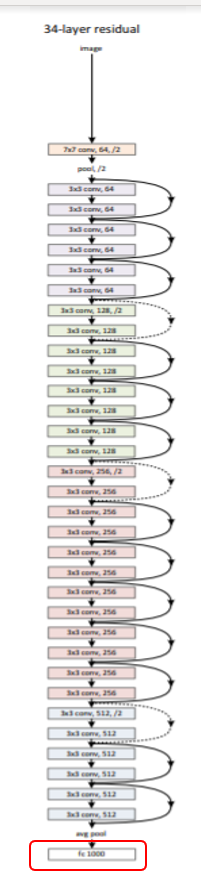

# Feature Extraction

In [25]:
for param in model.parameters():
    param.requires_grad=False

 Setting Model Parameters, attribute requires_grad to false when feature extraction is done.

# Model Details


To view different layers representing different operations 'model name' is to be executed.

In [26]:
model

DataParallel(
  (module): Sequential(
    (vone_block): VOneBlock(
      (simple_conv_q0): GFB()
      (simple_conv_q1): GFB()
      (simple): ReLU(inplace=True)
      (complex): Identity()
      (gabors): Identity()
      (noise): ReLU(inplace=True)
      (output): Identity()
    )
    (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (model): ResNetBackEnd(
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

The last layer of the downloaded model screenshot is below 

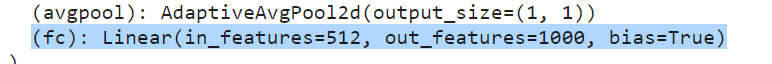

It indicates out_features is equal to 1000, so it must reinitialize model to be a Linear layer with 512 input features and 3 output class.

**torch.nn.Linear()** applies a linear transformation to the incoming data: 

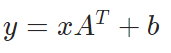




In [27]:
import torch.nn as nn
n_inputs=model.module.model.fc.in_features
last_layer=nn.Linear(n_inputs,3)

model.module.model.fc.out_features=last_layer
print('reinitialize model with output features as 3 :', model.module.model.fc.out_features)
model

reinitialize model with output features as 3 : Linear(in_features=2048, out_features=3, bias=True)


DataParallel(
  (module): Sequential(
    (vone_block): VOneBlock(
      (simple_conv_q0): GFB()
      (simple_conv_q1): GFB()
      (simple): ReLU(inplace=True)
      (complex): Identity()
      (gabors): Identity()
      (noise): ReLU(inplace=True)
      (output): Identity()
    )
    (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (model): ResNetBackEnd(
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Note:- Expand below cell to see the resnet34

In [28]:
features_resnet34 = []
for key,value in model._modules.items():
    features_resnet34.append(value)

features_resnet34

[Sequential(
   (vone_block): VOneBlock(
     (simple_conv_q0): GFB()
     (simple_conv_q1): GFB()
     (simple): ReLU(inplace=True)
     (complex): Identity()
     (gabors): Identity()
     (noise): ReLU(inplace=True)
     (output): Identity()
   )
   (bottleneck): Conv2d(512, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (model): ResNetBackEnd(
     (layer1): Sequential(
       (0): Bottleneck(
         (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
         (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (relu): ReLU(inplace=True)
         (

**Now last layer shows out_features as 3.**

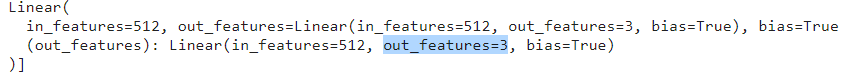

# Calculating Parameters of Convolutional Layer 

## 2D convolutional layer

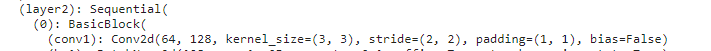

We have general syntax for convolutional2D layer as 

nn.Conv2d(in_channels, out_channels, kernel_size, stride) here in resnet34 it is like nn.Conv2d(64, 128, kernel_size = (3,3), stride=(3,3)), so number of parameters for this conv2D can be calculated as:

in_channels * out_channels * filter_height * filter_width 

In [29]:
conv_param = 64 * 128 * 3 * 3
print(' Number of Parameters for conv2D is :', conv_param )

 Number of Parameters for conv2D is : 73728


## CrossEntropyLoss

The loss for the model is to be set, then run the training and validation function for the set number of epochs. Notice, depending on the number of epochs this step may take a while on a CPU. Also, the default learning rate is not optimal for all of the models, so to achieve maximum accuracy it would be necessary to tune for each model separately.

In [30]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.005,momentum=0.9, weight_decay=0.0005)

# Training Model

param.requires_grad will be which is by default True for feature extraction we have set it False. When it is True  backpropagration will be there. In order for the model to avoide overfitting, layers is to be freezed.

In order to freeze a layer, requires_grad is to be set to False. Here setting freezeing layers from 1 to 6.

In [31]:
param.requires_grad=True
ct = 0
for child in model.module.model.children():
    print(child)
    print("next")
    ct += 1
    if ct < 2:
        for param in child.parameters():
            param.requires_grad = False

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, ke

In [32]:
#n_epochs=1
EPOCHS = 15
epoch_loss = []

for epoch in range(1, EPOCHS+1): 
    running_loss = 0.0
    train_losses = []
    for i, (inputs, labels) in enumerate(train_dataloader):
        
        if torch.cuda.is_available():
            # print("cuda available")
            # inputs , labels = inputs.cuda(), labels.cuda()
            model = model.to(device)
            inputs = inputs.to(device)
            labels = labels.to(device)

        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() 
        if i % 20 == 19:    
                
                print("Epoch {}, batch {}, training loss {}".format(epoch, i+1,running_loss/20))
        
        train_losses.append(running_loss/20)
        running_loss = 0.0
    epoch_loss.append(np.mean(train_losses))
    

print('\nFinished Training')

Epoch 1, batch 20, training loss 0.42628955841064453
Epoch 1, batch 40, training loss 0.3982424020767212
Epoch 1, batch 60, training loss 0.35428705215454104
Epoch 1, batch 80, training loss 0.3302165031433105
Epoch 2, batch 20, training loss 0.30313878059387206
Epoch 2, batch 40, training loss 0.27758309841156004
Epoch 2, batch 60, training loss 0.21790549755096436
Epoch 2, batch 80, training loss 0.17844462394714355
Epoch 3, batch 20, training loss 0.14428703784942626
Epoch 3, batch 40, training loss 0.11428276300430298
Epoch 3, batch 60, training loss 0.1304006576538086
Epoch 3, batch 80, training loss 0.09771813750267029
Epoch 4, batch 20, training loss 0.10910307168960572
Epoch 4, batch 40, training loss 0.11780296564102173
Epoch 4, batch 60, training loss 0.0833302080631256
Epoch 4, batch 80, training loss 0.12507630586624147
Epoch 5, batch 20, training loss 0.10190273523330688
Epoch 5, batch 40, training loss 0.09101727604866028
Epoch 5, batch 60, training loss 0.060667377710342

In [33]:
# After training, you can evaluate the model on the test set if needed
# Example evaluation code:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
predictions = []
with torch.no_grad():
    model = model.to(device)
    for inputs, labels in test_dataloader:
        
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        print(outputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted)
        print(predicted)
        print(labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {100 * accuracy:.2f}%')

tensor([[10.1484,  7.2890,  0.5296,  ..., -0.6838,  0.8601,  1.2263],
        [11.5355,  8.1930,  0.9143,  ..., -0.6042,  0.1432, -0.2022],
        [ 9.5807,  9.2219,  0.3496,  ..., -0.8756,  2.6455,  3.0549],
        ...,
        [ 9.5882,  9.2654,  3.1626,  ..., -0.8863,  1.6565,  1.6076],
        [10.2346,  6.2699, -0.2318,  ...,  0.1977,  0.7602,  1.8022],
        [ 9.6498,  7.0628,  0.0124,  ..., -1.3718,  0.4988,  1.4143]],
       device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
tensor([[ 9.8928,  7.5568,  2.0813,  ..., -1.9038,  1.3728,  3.2016],
        [12.8998,  9.6087,  0.9065,  ...,  1.5904,  2.0612, -0.2065],
        [ 9.8886,  8.6570,  2.0734,  ...,  0.1505,  0.7179,  0.6816],
        ...,
        [ 9.0890,  8.9198,  1.5893,  ..., -1.6740,  1.8433,

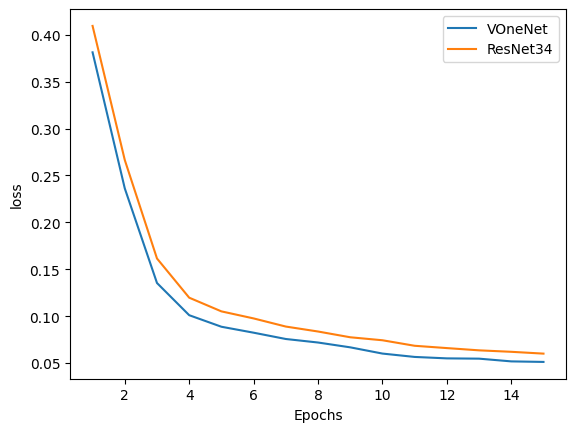

In [37]:
og_epoch_loss = [0.40952867587407427, 0.26652231944931876, 0.16148274779319763, 0.11967694722943835, 0.10507665216094918, 0.09755714499288136, 0.08887948240670893, 0.08359867865840595, 0.07745808663260606, 0.07426846924755309, 0.06838325971116622, 0.065916811277469, 0.06351385119888517, 0.061954745269483975, 0.060016916808154845]

plt.figure()

plt.plot(range(1,16), epoch_loss, label='VOneNet')
plt.plot(range(1,16), og_epoch_loss, label='ResNet34')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


In [35]:
print(test_dataloader)

In [36]:
def plot_image(img_tensor, annotation):
    
    fig,ax = plt.subplots(1)
    img = img_tensor.cpu().data

    # Display the image
    ax.imshow(img.permute(1, 2, 0))
    annots = annotation["boxes"].cpu().data
    
    for box in annots:
        xmin, ymin, xmax, ymax = box

        # Create a Rectangle patch
        rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

print("Prediction")
plot_image(imgs[2], preds[2])
print("Target")
plot_image(imgs[2], annotations[2])

torch.save(model.state_dict(),'model.pt')
model2 = get_model_instance_segmentation(3)

Prediction


NameError: name 'imgs' is not defined

# Reference

https://arxiv.org/pdf/1512.03385.pdf

